In [18]:
from cdsgd import DSClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, accuracy_score
import wittgenstein as lw
#pca
from sklearn.decomposition import PCA

In [19]:
Tetra = pd.read_csv('../data/Tetra_Data.csv')
Tetra_labels = pd.read_csv('../data/Tetra_Labels.csv')

In [20]:
scaler = StandardScaler()
Tetra_scaled = scaler.fit_transform(Tetra)
Tetra = pd.DataFrame(Tetra_scaled, columns=Tetra.columns)
models = []
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(Tetra)
models.append({'model': kmeans, 'name': 'KMeans', 'labels': kmeans_labels})
print('Kmeans Silhouette Score:', silhouette_score(Tetra, kmeans_labels), "Number of Clusters:", len(np.unique(kmeans_labels)))

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(Tetra)
models.append({'model': dbscan, 'name': 'DBSCAN', 'labels': dbscan_labels})
if len(np.unique(dbscan_labels)) > 1:
    print('DBSCAN Silhouette Score:', silhouette_score(Tetra, dbscan_labels), "Number of Clusters:", len(np.unique(dbscan_labels)))
else:
    print('DBSCAN Silhouette Score: N/A', "Number of Clusters:", len(np.unique(dbscan_labels)))

agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(Tetra)
models.append({'model': agg, 'name': 'Agglomerative', 'labels': agg_labels})
print('Agglomerative Silhouette Score:', silhouette_score(Tetra, agg_labels), "Number of Clusters:", len(np.unique(agg_labels)))


Kmeans Silhouette Score: 0.5057941660374363 Number of Clusters: 4
DBSCAN Silhouette Score: 0.30661015070467 Number of Clusters: 4
Agglomerative Silhouette Score: 0.495198706501583 Number of Clusters: 4


## Lime

In [21]:
clustterToExplain = 1
i = 100 # instance to explain

#KMeans
y = (kmeans_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Tetra, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Tetra, y)
print('KMeans Accuracy:', accuracy_score(y, clf.predict(Tetra)))
explainer = LimeTabularExplainer(Tetra.values, mode='classification', feature_names=Tetra.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Tetra.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

#DBSCAN
if len(np.unique(dbscan_labels)) > 1:
    y = (dbscan_labels == clustterToExplain).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(Tetra, y, test_size=0.2, random_state=42)
    clf = LogisticRegression()
    clf.fit(Tetra, y)
    print('DBSCAN Accuracy:', accuracy_score(y, clf.predict(Tetra)))
    explainer = LimeTabularExplainer(Tetra.values, mode='classification', feature_names=Tetra.columns, class_names=['0', '1'], discretize_continuous=True)
    exp = explainer.explain_instance(Tetra.values[i], clf.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True, show_all=False)

#Agglomerative
y = (agg_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Tetra, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Tetra, y)
print('Agglomerative Accuracy:', accuracy_score(y, clf.predict(Tetra)))
explainer = LimeTabularExplainer(Tetra.values, mode='classification', feature_names=Tetra.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Tetra.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

KMeans Accuracy: 0.9925


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


DBSCAN Accuracy: 0.955


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Agglomerative Accuracy: 0.99


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Decision tree

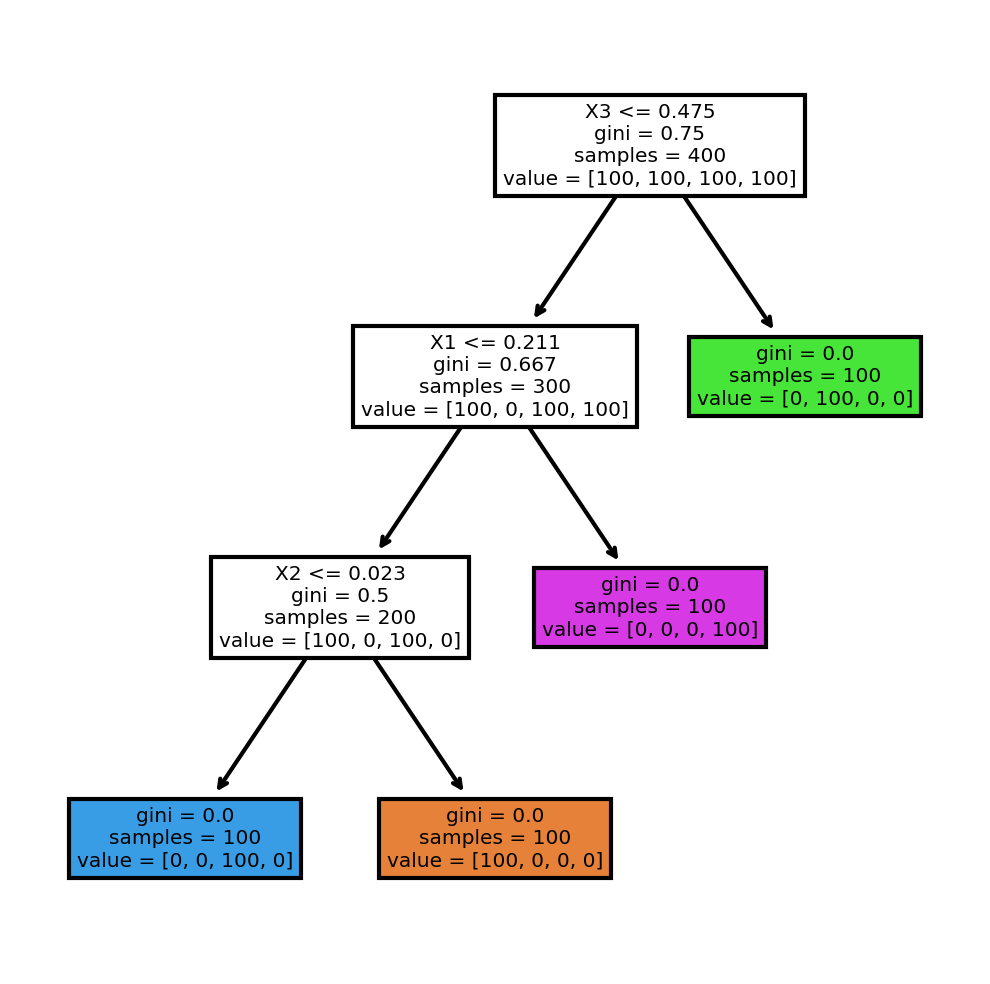

Decision Tree Accuracy: 1.0


In [22]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Tetra, kmeans_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Tetra.columns)
plt.show()
y_pred = dt.predict(Tetra)
print('Decision Tree Accuracy:', accuracy_score(kmeans_labels, y_pred))


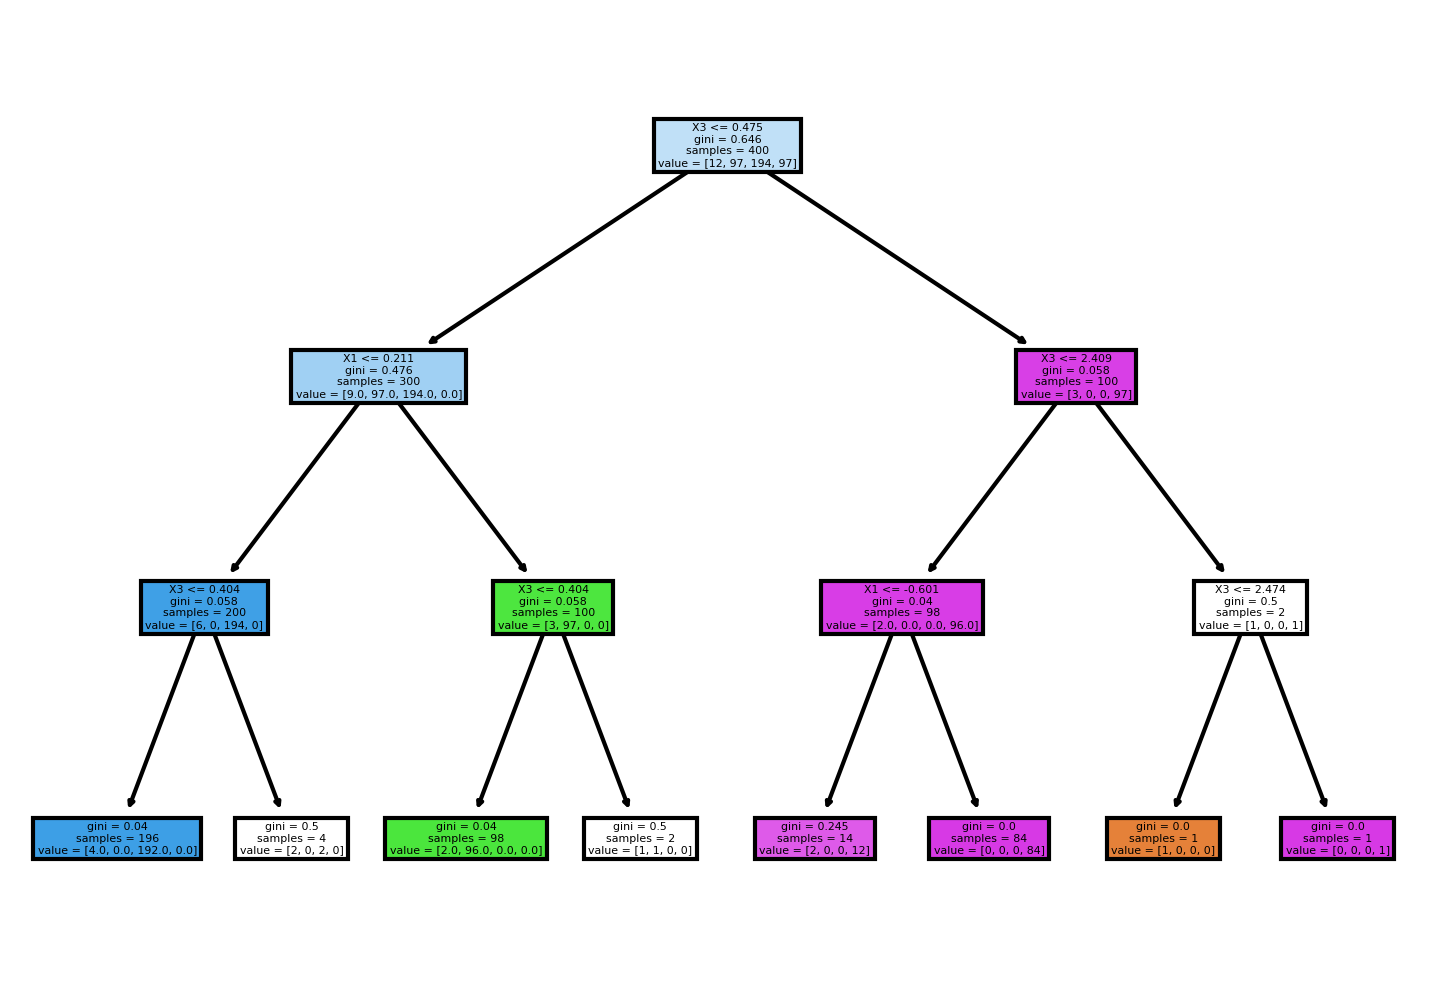

Decision Tree Accuracy: 0.9725


In [34]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Tetra, dbscan_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Tetra.columns)
plt.show()
y_pred = dt.predict(Tetra)
print('Decision Tree Accuracy:', accuracy_score(dbscan_labels, y_pred))

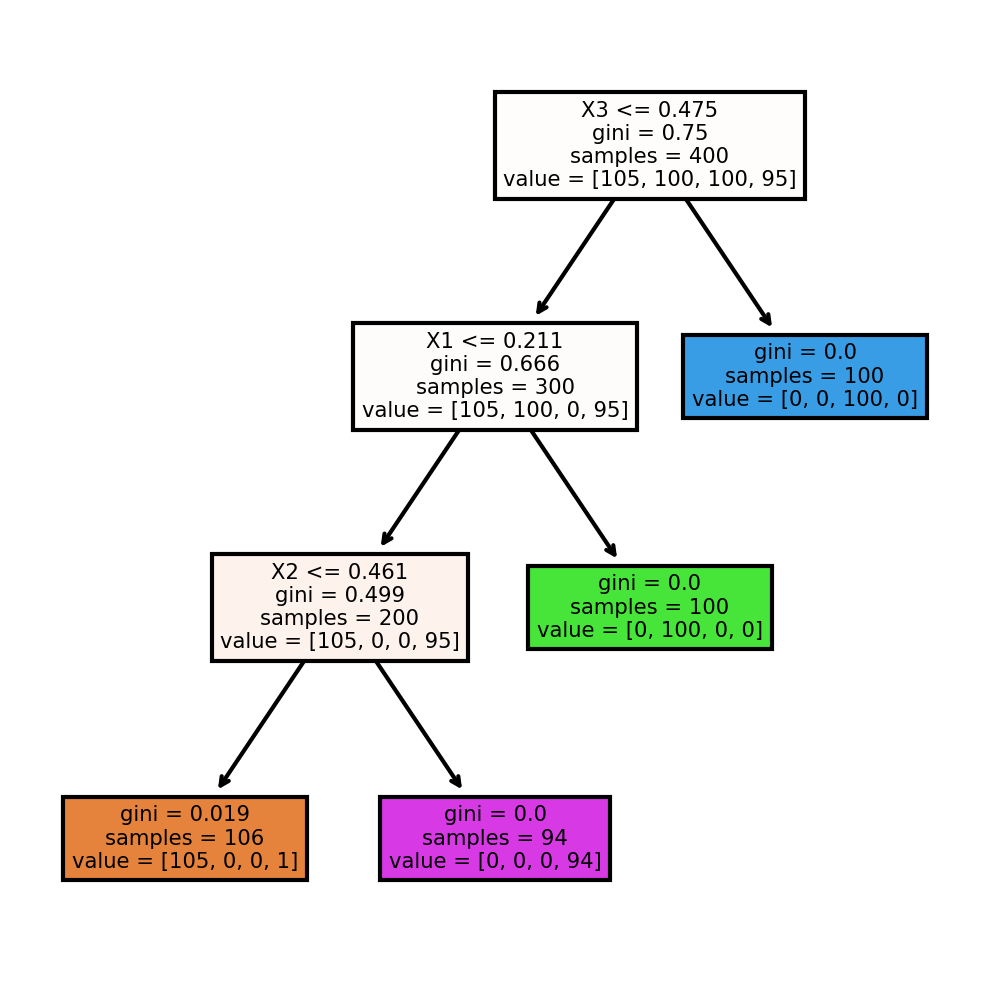

Decision Tree Accuracy: 0.9975


In [24]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Tetra, agg_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Tetra.columns)
plt.show()
y_pred = dt.predict(Tetra)
print('Decision Tree Accuracy:', accuracy_score(agg_labels, y_pred))

# RIPPER

In [37]:
pos = 3
# cambiamos las etiquetas para que el positivo sea el cluster 0
kmeans_labels_pos = (kmeans_labels == pos).astype(int)
dbscan_labels_pos = (dbscan_labels == pos).astype(int)
agg_labels_pos = (agg_labels == pos).astype(int)
# KMeans
ripper = lw.RIPPER()
df = pd.concat([Tetra, pd.DataFrame(kmeans_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Tetra)
print('RIPPER Accuracy KMeans:', accuracy_score(kmeans_labels_pos, y_pred))
# DBSCAN
ripper = lw.RIPPER()
df = pd.concat([Tetra, pd.DataFrame(dbscan_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Tetra)
print('RIPPER Accuracy DBSCAN:', accuracy_score(dbscan_labels_pos, y_pred))
# Agglomerative
ripper = lw.RIPPER()
df = pd.concat([Tetra, pd.DataFrame(agg_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Tetra)
print('RIPPER Accuracy Agglomerative:', accuracy_score(agg_labels_pos, y_pred))

[[X1=>1.61] V [X1=0.94-1.61] V [X1=0.41-0.94^X3=-0.43--0.3] V [X1=0.41-0.94^X3=-0.84--0.57] V [X1=0.41-0.94^X3=-0.3--0.0073] V [X1=0.41-0.94^X3=-1.12--0.84] V [X2=-0.29-0.032^X3=-0.0073-0.25] V [X1=0.41-0.94^X3=<-1.12] V [X1=0.41-0.94^X3=-0.57--0.43] V [X1=0.41-0.94^X3=-0.0073-0.25]]
RIPPER Accuracy KMeans: 0.995
[]
RIPPER Accuracy DBSCAN: 1.0
[[X2=>1.37] V [X2=0.89-1.37^X1=-1.19--0.86] V [X2=0.89-1.37^X3=-0.0073-0.25] V [X2=0.51-0.89^X3=-1.12--0.84] V [X2=0.89-1.37^X3=-0.57--0.43] V [X2=0.51-0.89^X1=<-1.19] V [X2=0.89-1.37^X1=-0.86--0.59] V [X2=0.89-1.37^X3=<-1.12] V [X2=0.51-0.89^X1=-1.19--0.86] V [X2=0.89-1.37^X1=<-1.19] V [X2=0.51-0.89^X1=-0.59--0.45] V [X2=0.51-0.89^X1=-0.45--0.17] V [X2=0.89-1.37^X3=-1.12--0.84] V [X2=0.28-0.51^X1=<-1.19]]
RIPPER Accuracy Agglomerative: 0.97


ripper.py: .fit: RuntimeWarning: 
No positive samples. Existing target labels=[0].

ripper.py: .fit | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.

base.py: .predict | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.



## DSClustering

Optimization started
Processing epoch	373	0.0001	

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Training time: 20.37s, epochs: 400

Least training loss reached: 0.000


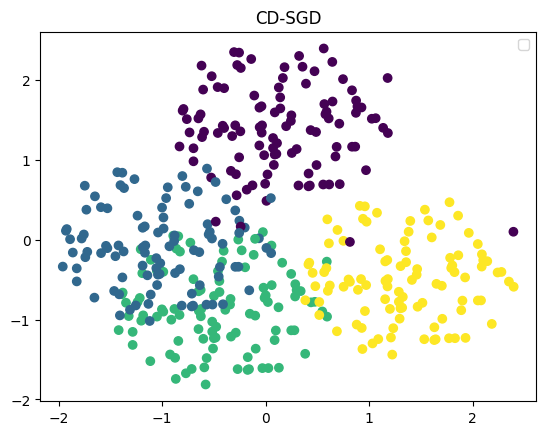

In [26]:
cdsgd = DSClustering(data=Tetra,cluster=4)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD con 4 clusters', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Tetra)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [27]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.636] R12: X1 < -0.619
			0: 0.476	1: 0.002	2: 0.000	3: 0.372	Unc: 0.151

	[0.630] R22: -0.013 < X3 < 0.660
			0: 0.397	1: 0.000	2: 0.236	3: 0.366	Unc: 0.000

	[0.628] R13: -0.619 < X1 < 0.069
			0: 0.456	1: 0.026	2: 0.000	3: 0.384	Unc: 0.135

	[0.540] R21: -0.686 < X3 < -0.013
			0: 0.295	1: 0.000	2: 0.348	3: 0.342	Unc: 0.014

	[0.517] R20: X3 < -0.686
			0: 0.271	1: 0.000	2: 0.343	3: 0.373	Unc: 0.013

	[0.489] R37: Negative X1 - 0.069, X2 - -0.081
			0: 0.287	1: 0.278	2: 0.269	3: 0.000	Unc: 0.166

	[0.393] R19: X2 > 0.606
			0: 0.345	1: 0.103	2: 0.000	3: 0.000	Unc: 0.552

	[0.325] R47: Negative X2 - -0.081, X3 - -0.013
			0: 0.206	1: 0.308	2: 0.000	3: 0.000	Unc: 0.486

Most important rules for Cluster 1

	[0.494] R46: Positive X2 - -0.081, X3 - -0.013
			0: 0.000	1: 0.374	2: 0.204	3: 0.075	Unc: 0.347

	[0.492] R17: -0.768 < X2 < -0.081
			0: 0.000	1: 0.245	2: 0.494	3: 0.250	Unc: 0.011

	[0.491] R18: -0.081 < X2 < 0.606
			0: 0.028	1: 0.400	2: 

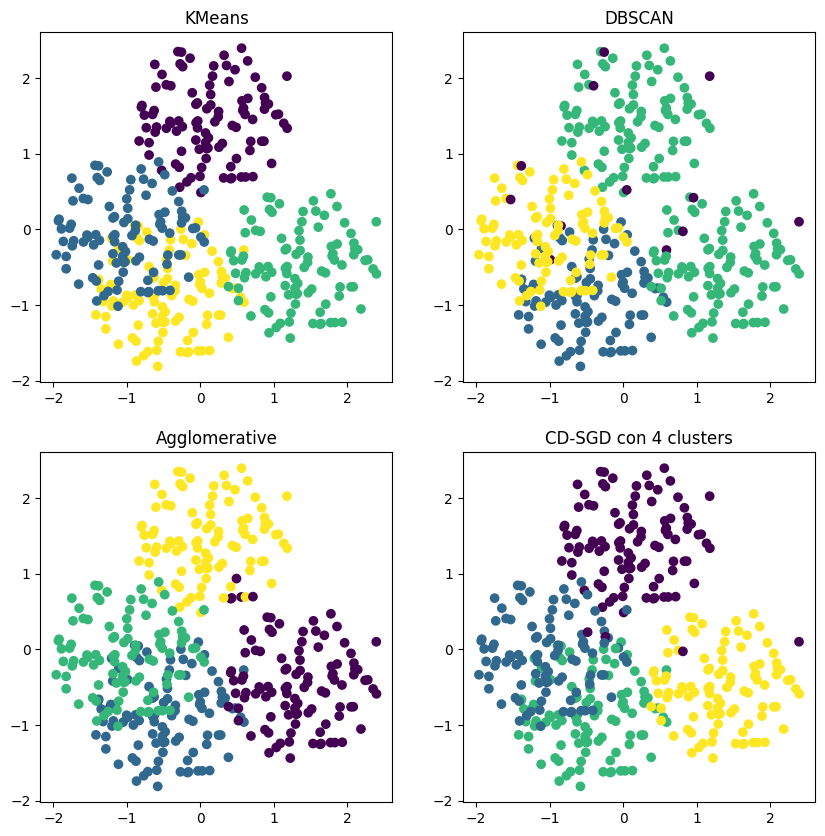

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(Tetra)
    ax[i//2, i%2].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i//2, i%2].set_title(model['name'])
plt.show()